# Individual Assignment

The goal of this assignment is predict probabilities of churn for telco customers. The data is available in the file `churn.csv`. 

The data contains the following columns:

- `customerID`: A unique identifier for each customer.
- `gender`:
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0).
- `Partner`: Whether the customer has a partner or not (Yes, No).
- `Dependents`: Whether the customer has dependents or not (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has a phone service or not (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No).
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned or not (Yes or No).

## Instructions

* The target variable is `Churn`.
* You should use Logistic Regression to make the predictions.
* Follow the steps below to prepare the data and build the model.


In [227]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns 

## Step 1 (1 point)

Load the data in the file `churn.csv` and explore it.

What are you going to do with `customerID`?

#we can remove customer ID as it is junt an identification and we dont'n need to explore.

In [228]:
df = pd.read_csv(r'churn.csv', sep = ',')

In [229]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [230]:
df = df.drop(columns =['customerID'])

In [231]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2  (1 point)

Explore the dataset.

What's the deal with the `TotalCharges` column? Fix the column `TotalCharges` and convert it to a numerical data type.

What about missing values?

In [232]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Podemos obervar algo raro en la columna de TotalCharges , ya que a pesar de estar compuesta por valores numericos, aparece que es un "object", cuando debería ser numérica

In [233]:
df['TotalCharges'].str.strip().eq("").sum()

11

Podemos ver que hay 11 filas que tienen espacios vacíon, que no se van a poder convertir en valores numericos.
Vamos a concertir todo lo no numérico en Nan, para poder convertir la variable en numérica.

In [234]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [235]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [236]:
missing_values = df.isnull().sum()
missing_values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [237]:
(df['MonthlyCharges'] == 0).sum()


0

MonthlyCharges = 0, eso significa que los valores nulos en TotalCharges no se deben a un plan gratuito, sino probablemente a registros incompletos.

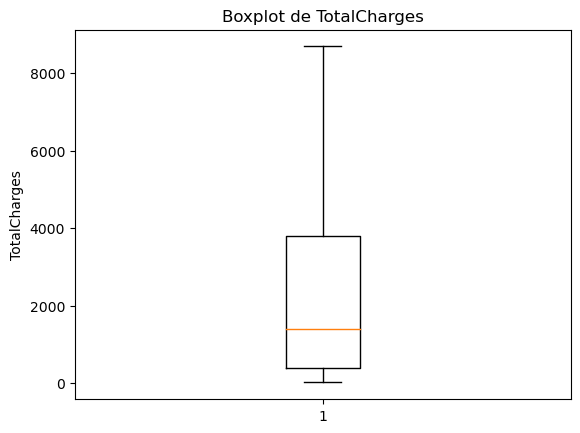

In [238]:
plt.boxplot(df['TotalCharges'].dropna())
plt.title("Boxplot de TotalCharges")
plt.ylabel("TotalCharges")
plt.show()

Vemos que tampoco hay outliers en este boxplot, por lo tanto podemos imputar los valores nulos imputando por la media. 

In [239]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [240]:
df['TotalCharges'].isnull().sum()

0

## Step 3 (1 point)

Build new features. Don't sweat it too much, just create a few new features that you think could be useful.

In [241]:
#puede ser útil si quieres detectar inconsistencias o clientes que hayan cambiado de tarifa.

In [242]:
df['ChargeDifference'] = df['MonthlyCharges'] - (df['TotalCharges'] / (df['tenure'] + 1))

In [243]:
#ContractLengthCategory

In [244]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [245]:
df['ContractLengthCategory'] = df['Contract'].replace({
    'Month-to-month': 'Short',
    'One year': 'Medium',
    'Two year': 'Long'
})

In [246]:
#HasMultipleServices

In [247]:
service_cols = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']
df['HasMultipleServices'] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

In [248]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeDifference,ContractLengthCategory,HasMultipleServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000,Short,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,2.964286,Medium,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,17.800000,Short,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2.283696,Medium,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,20.150000,Short,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5.180000,Medium,3
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2.338356,Medium,3
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.729167,Short,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,13.080000,Short,1


## Step 4 (1 point)

Split the data into train and test sets, use 20% of the data for the test set.

Use `42` as the random state.

Is the dataset balanced? Justify your question and split your data accordingly, using the `stratify` parameter if necessary.

In [249]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [250]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeDifference,ContractLengthCategory,HasMultipleServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000,Short,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,2.964286,Medium,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,17.800000,Short,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2.283696,Medium,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,20.150000,Short,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,5.180000,Medium,3
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,2.338356,Medium,3
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0.729167,Short,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,13.080000,Short,1


In [251]:
# Proportion of classes
churn_dist = df['Churn'].value_counts(normalize=True)
print(churn_dist)


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


The dataset is imbalanced, since the proportion of churners (26%) is much smaller than non-churners (74%).
Therefore, when splitting into training (80%) and test (20%) sets, I used the stratify=y parameter to preserve the class distribution.

In [252]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"]) 
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

## Step 5 (1 point)

Encode the categorical variables using `OneHotEncoder`.

Remove the original categorical columns and add the encoded columns.

In [253]:
from sklearn.preprocessing import OneHotEncoder

In [254]:
ohe = OneHotEncoder(sparse_output=False)

In [255]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


encoder = OneHotEncoder(sparse=False, drop='first')  


encoded = encoder.fit_transform(df[categorical_cols])

df_encoded = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

C:\Users\lucia.pellicer\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [256]:
df_encoded

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContractLengthCategory_Medium,ContractLengthCategory_Short
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [257]:
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [258]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ChargeDifference,HasMultipleServices,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContractLengthCategory_Medium,ContractLengthCategory_Short
0,0,1,29.85,29.85,0,14.925000,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,34,56.95,1889.50,0,2.964286,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,1,17.800000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,0,2.283696,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,1,20.150000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,5.180000,3,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7039,0,72,103.20,7362.90,0,2.338356,3,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7040,0,11,29.60,346.45,0,0.729167,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7041,1,4,74.40,306.60,1,13.080000,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## Step 6 (1 point)

Prepare the target variable for the model.

## Step 7 (1 point)

Train a Logistic Regression model instantiated with the following baseline hyperparameters:

```python
LogisticRegression(random_state=random_state, max_iter=1000, class_weight='balanced')
```

This will be your baseline model and performance metric.

In [259]:
X = df.drop(columns=["Churn"]) 
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(
    random_state=42,   # mismo random_state usado en el split
    max_iter=1000, 
    class_weight='balanced'  # corrige el desbalance de clases
)

# 2. Entrenar con el set de entrenamiento
log_reg.fit(X_train, y_train)

# 3. Predecir en el set de test
y_pred = log_reg.predict(X_test)

# 4. Evaluar rendimiento
f1 = f1_score(y_test, y_pred)
print('baseline f1 =', f1)


baseline f1 = 0.6218487394957983


## Step 8 (1 point)

Find the best hyperparameters for the model using GridSearchCV, using the following hyperparameters:
- `penalty`
- `C`
- `class_weight`

The documentation for the Logistic Regression model can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Use as many or as few values you want for the number of folds and hyperparameters.

Return the best hyperparameters and the best F1-score.

In [282]:
from sklearn.model_selection import GridSearchCV


# grid for Logistic regression
param_grid = {
    'penalty':['l2'],
    'C':[0.01, 0.1, 1.0, 10.0],
    'class_weight':[None]
}

k_folds = 10

# use f1 as scoring to match evaluation metric
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=k_folds,
    n_jobs=-1,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'class_weight': [None],
                         'penalty': ['l2']},
             scoring='f1')

## Step 9 (1 point)

Train a new Logistic Regression model using the best hyperparameters found in the previous step, and compare the F1-score with the baseline model.

In [284]:
best_params = grid_search.best_params_
print("Best params from GridSearch:", best_params)


best_model = grid_search.best_estimator_   # ya viene con los mejores hiperparámetros y refit hecho
y_pred_best = best_model.predict(X_test)
f1_best = f1_score(y_test, y_pred_best)

# baseline ya entrenado previamente como `log_reg`
y_pred_base = log_reg.predict(X_test)
f1_base = f1_score(y_test, y_pred_base)

print("Best params:", grid_search.best_params_)
print("F1 (best):", f1_best)
print("F1 (baseline):", f1_base)
print("Mejora:", f1_best - f1_base)

Best params from GridSearch: {'C': 1.0, 'class_weight': None, 'penalty': 'l2'}
Best params: {'C': 1.0, 'class_weight': None, 'penalty': 'l2'}
F1 (best): 0.6020558002936857
F1 (baseline): 0.6218487394957983
Mejora: -0.01979293920211267


## Step 10 (1 point)

How much did the F1-score improve when using the best hyperparameters?

Calculate it using the formula:

$$ \text{F1-score improvement (\%)} = 100 \cdot \frac{\text{F1-score best model} - \text{F1-score baseline model}}{\text{F1-score baseline model}} $$

Grading:

* No improvement: 0 points
* 0-1%: 0.25 point
* 1-2%: 0.5 points
* 2-3%: 0.75 points
* 3% or more: 1 point
